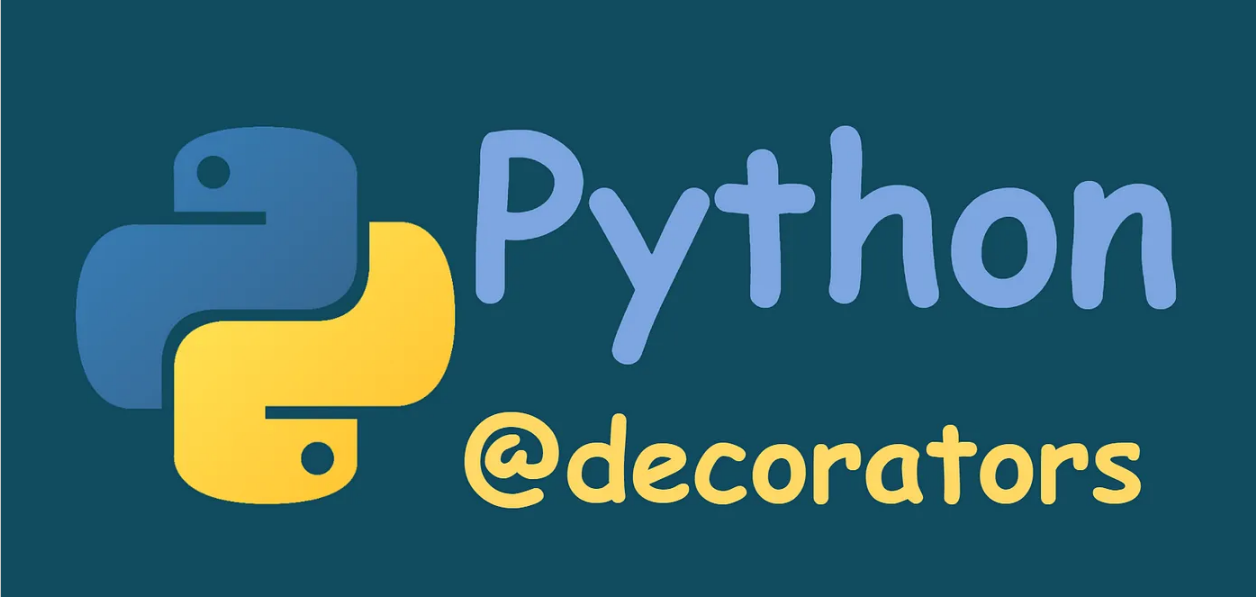

# 1. Հիմունքներ

### Q 1: Ինչ է դեկորատորը ?

Դեկորատորը **ֆունկցիա** է, որը որպես արգումենտ ստանում է ուրիշ **ֆունկցիա** և հետ է վերադարձնում վերջինս՝ նրան ավելացնելով լրացուցիչ վարքագիծ։ 

- Դեկորատորի հիմնական տեսքը այսպիսին է․

    ```
    def decorator_fn(func):

        def wrapper():
            # Do something before
            result = func()
            # Do something after
            return result

        return wrapper
    ```
<br>

- Դեկորացնում ենք ֆունկցիան այն տալով դեկորատոր ֆունկցիային.
     ```
     my_func = decorator_fn(my_func)
     ```


Օրինակ։

In [274]:
def say_hello():
    return "Hello!"

In [275]:
say_hello()

'Hello!'

In [276]:
# Եկեք սարքենք դեկորատոր, որը վերադարձրած տեքստը կսարքի մեծատառ․
def upper_decorator(func):
    def wrapper():
        result = func()
        result = result.upper()
        return result
    return wrapper

In [278]:
# Ստացանք մեր ֆունկցիան բայց արդեն դեկորացված
say_hello = upper_decorator(say_hello)

In [279]:
say_hello()

'HELLO!'


Python֊ը թույլ է տալիս ավելի հեշտ գրելաձևով օգտագործել դեկորատորները օգտվելով @ սիմվոլից. <br>

Հետևյալը անում է հենց նույնը գործողությունը ինչ որ ```say_hello = upper_decorator(say_hello)``` :

In [281]:
# Նոր գրելաձև
@upper_decorator
def say_hello():
    return "Hello!"

In [282]:
say_hello()

'HELLO!'

### Q 2: Ինչպես է աշխատում ?

In [333]:
def my_decorator(func):
    print("Before wrapper definition")
    
    def wrapper():
        print("Inside wrapper.")
        result = func()
        print(f"Function result, {result}")
        
        return result
    
    print("After wrapper definition")
    return wrapper

In [334]:
# Ինչ տեղի կունենա երբ աշխատեցնենք այս վանդակը?
@my_decorator
def say_hello():
    return "Hello!"

Before wrapper definition
After wrapper definition


In [335]:
result = say_hello()

Inside wrapper.
Function result, Hello!


In [336]:
result

'Hello!'

In [292]:
# say_hello = my_decorator(say_hello)

Before wrapper definition
After wrapper definition


In [297]:
say_hello

<function __main__.my_decorator.<locals>.wrapper()>

In [298]:
result = say_hello()

Inside wrapper.
Function result, Hello!


In [69]:
result

In [71]:
# ԻՆչ կլինի եթե հանենք return wrapper ?

In [269]:
# ԻՆչ կլինի եթե հանենք return result ?

### Q 3: Ինչպես արգումենտ փոխանցենք դեկորացվող ֆունցիային ?

Ունենք ֆունկցիա որը ընդունում է ինչ֊որ արգումենտներ. Հնարավոր է արդյոք այն դեկորացնել?

In [337]:
# Մեր ֆունցկիան արդեն ունի արգումենտ
def say_hello(name):
    return f"Hello {name}!"

In [355]:
def upper_decorator(func):

    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        result = result.upper()
        return result
        

    return wrapper

In [358]:
@upper_decorator
def say_hello(name, surname):
    return f"Hello {name}!"

In [357]:
say_hello("Maya")

'HELLO MAYA!'

# 2. Օրինակներ

Մեր դեկորատորի վերջնական տեսքը ստացվեց այսպիսին
```
def decorator_fn(func):

        def wrapper(*args, **kwargs):
            # Do something before
            result = func(*args, **kwargs)
            # Do something after
            return result
            
        return wrapper
```

### @logging

In [361]:
# Ունենք հետևյալ ֆունկցիան
def add(x, y):
    return x + y

In [362]:
add(2,3)

5

In [365]:
add.__name__

'add'

In [374]:
# Եկեք սարքենք logging֊ի դեկորատորը
def logging_decorator(func):
    def wrapper(*args, **kwargs):
        print(f"Function name {func.__name__}, args {args}, kwargs {kwargs}")
        result = func(*args, **kwargs)
        print(f"Result: {result}")
    return wrapper
        

In [433]:
@logging_decorator
def add(x, y):
    return x + y


In [376]:
@logging_decorator
def multiply(x, y):
    return x * y


In [377]:
multiply(3,4)

Function name multiply, args (3, 4), kwargs {}
Result: 12


In [378]:
add(2,3)

Function name add, args (2, 3), kwargs {}
Result: 5


Այլ օրինակներ
- @timing_decorator
- @caching_decorator
- @debug_decorator
- @retry_decorator
- @validate_decorator <br>
...

# 3. Դեկորատորները կլասսերի հետ

Մինչև հիմա մենք օգտագործել ենք դեկորատորները ֆունկցիաների վրա։ 
```
@decorator_fn
def my_function():
    ...
```
Հնարավոր է նաև դեկորատորները տեղադրել կլասսերի վրա։ Երկու տարբերակ կա դրան հասնելու։ 
1. Դեկորատորները դնել հենց կլասսի վրա
```
@decorator_fn
class MyClass():
     ... 
```

2. Դեկորատորները դնել մեթոդների վրա
```
class MyClass():
    
       @decorator_fn
       def my_method(self):
           ...
```


### Դեկորատորները մեթոդների վրա

Մեթոդների հետ աշխատելու համար python֊ը տրամադրում է հետևյալ ```built-in``` դեկորատորները:
- ```@classmethod```: Այս դեկորատորի օգնությամբ կարելի է ստեղծել մեթոդներ, որոնք պատկանում են հենց կլասսին այլ ոչ թե նրա որևէ օբյետին։ Մեթոդին որպես առաջին արգումենտ փոխանցվում է կլասսը։ Կլասս մեթոդները սովորաբար օգտագործվում են որպես ֆակտորի մեթոդներ, որոնց օգնությամբ կլասսի օբյեկտները այլ ձևով են ստեղծվում: [Օրինակ](https://github.com/huggingface/transformers/blob/c475eca9cd9aa0b5a88b269b6a090b645391267d/src/transformers/models/gpt2/tokenization_gpt2_tf.py#L72)։
<br>

- ```@staticmethod```: Այս դեկորատորի օգնությամբ ստեղծված մեթոդները չեն կարող փոխել օբյեկտի կամ կլասսի վիճակը, քանի որ նրանք չունեն հասանելիություն ```cls``` և ```self``` արգումենտներին։ Նրանք պարզապես կցված են կլասսի ```namespace```-ին։
<br>

- ```@property```: Թույլ է տալիս ստեղծել ```getters``` և ```setters``` կլասսի դաշտերի համար։

Ամբողջական ցուցակը տրված է [այստեղ](https://wiki.python.org/moin/Decorators):

In [428]:
def check_balance_decorator(func):
    def wrapper(self, amount):
        if amount > self.balance:
            raise TypeError("The balance must be positive.")
        else:
            result = func(self, amount)
            return result

In [422]:
class BanckAccount:
    def __init__(self, name, balance):
        self.name = name 
        self.balance = balance
    
    def take_money(self, amount):
        return amount
    
    @classmethod
    def from_config(cls, config):
        print(cls)
        obj = BanckAccount(config["name"], config["balance"])
        return obj
    
    @check_balance_decorator
    def withdrawl(self, amount):
        self.balance -= amount
        return amount
        

In [423]:
account = BanckAccount("Anna", 2000)

In [424]:
account.balance

2000

In [427]:
amount = account.withdrawl(2000)

TypeError: The balance must be positive.

In [426]:
account.balance

1000

In [174]:
# Եկեք ստեղծենք from_config կլասս մեթոդը

In [175]:
# Եկեք սահմանափակենք balance-ի հասանելիությունը  

In [144]:
# Եկեք ստեղծենք check_balance դեկորատորը

In [150]:
def check_balance_decorator(func):
    ...

In [149]:
# !!!! Հնարավոր է այս դեկորատորը աշխատեցնել սովորական ֆունկցիա վրա էլ? --> HW

### Դեկորատորները կլասսերի վրա 

In [438]:
def logging_decorator(func):
    print(func)
    
    def wrapper(*args, **kwargs):
        print(f"Function name {func.__name__}, {func.__dict__}")
        result = func(*args, **kwargs)
        print(f"Result: {result}")
    return wrapper
        

In [439]:
@logging_decorator
class Student:
    def __init__(self, name, grade):
        self.name = name
        self.grade = grade   

<class '__main__.Student'>


In [440]:
# Student = logging_decorator(Student)

In [441]:
s = Student("Karen", 22)

Function name Student, {'__module__': '__main__', '__init__': <function Student.__init__ at 0x7fea05c6c670>, '__dict__': <attribute '__dict__' of 'Student' objects>, '__weakref__': <attribute '__weakref__' of 'Student' objects>, '__doc__': None}
Result: <__main__.Student object at 0x7fea05ce5a30>


In [431]:
s

In [190]:
# Կարող ենք պարզապես օգտագործել logging_decorator ??

Պետք է հիշել որ դեկորացնել կլասսը չի նշանակում դեկորացնել նրա մեթոդները նույնպես:
Կլասսի վրա դեկորատոր կանչելը նման է ֆունկցիայի կամ մեթոդի վրա այն կանչելուն, պարզապես տարբերվում է նրանով, որ դեկորատորը որպես արգումենտ ստանալու է կլասսը այլ ոչ թե ֆունկցիան։ Այիսնքն կարող ենք ասել, որ վերը նշվածը նույնն է ինչ

```
MyClass = dataclass(MyClass)
``` 

Կլասսի վրա դեկորատոր կանչելու ամենատարածված օրինակներից մեկը դա ```@dataclass``` ```built-in```-ն է ```dataclasses``` մոդուլից:

- ```@dataclass```: Այս դեկորատորի օգնությամբ ստեղծված կլասսերը պարունակում են հիմնականում տվյալներ։ Այն գալիս է արդեն իրեն կցված հիմնական ֆունկցիոնալությամբ: Կարելի է միանգամից ստեղծել, տպել, համեմատել նրա կլասսով ստեղծված օբյեկտներին: [Օրինակ](https://github.com/huggingface/transformers/blob/e547458c43dfdbbb8f6a7757237e234c44e20a8f/examples/research_projects/codeparrot/scripts/arguments.py#L6)

Այս երեք հայտարարման ձևերն էլ նույն բանն են անում:

```
@dataclass
class MyClass:
    ...

@dataclass()
class MyClass:
    ...

@dataclass(init=True, repr=True, eq=True, order=False, unsafe_hash=False, frozen=False)
class MyClass:
    ...


### Կլասսերը որպես դեկորատորներ *

Մինչև հիմա մենք օգտագործել ենք ֆունկցիաները որպես դեկորատորներ։ Պարզվում է որ կարելի է դեկորատորներ պատրաստել նաև կլասսերով: Կլասս դեկորատորները օգտագործվում են այն դեպքերում երբ ուզում ենք ինչ֊որ վիճակ (state) պահել.



Որպեսզի կարողանանք կլասսը որպես դեկորատոր օգտագործել, պարտադիր պայման է որ այն ունենա ```__init__``` և ```__call__ ``` մեթոդները։ 
```
class MyDecorator:
    def __init__(self, func):
        self.func = func
        self.state = "some_state"
     
    def __call__(self):
        # Do something before
        self.func()
        self.state = "new_state"
        # Do something after
 
``` 
Երբ ավելացնում ենք կլասս դեկորատորը ֆունկցիային
```
@MyDecorator
def my_function():
    ...
```

այն նույն բանն է կատարում ինչ
```
my_function = MyDecorator(my_function)
```

In [454]:
# Եկեք վերհիշենք թե ինչ է callable֊ը?

class MyClass:
    def my_method(self):
        ...

In [455]:
dir(MyClass)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'my_method']

In [447]:
obj = MyClass()

In [448]:
obj()


TypeError: 'MyClass' object is not callable

#### @CountCalls class

In [477]:
# Եկեք ստեղծենք դեկորատոր, որը կհաշվի քանի անգամ է այս ֆունկցիան կանչվել
class CountCalls:
    def __init__(self, func):
        self.func = func
        self.num_call = 0
    
    def __call__(self, *args, **kwargs):
        result = self.func(*args, **kwargs)
        self.num_call += 1
        print(f"Number of calls: {self.num_call}")
        

In [478]:
@CountCalls
def add(x, y):
    return x + y

In [479]:
# add = CountCalls(add)

In [480]:
add(3,5)

Number of calls: 1


In [483]:
add(5,7)

Number of calls: 4


# Ամփոփում

- ԻՆչ են դեկորատորները
- Ինչերը կարելի է դեկորացնել
- ԻՆչից կարելի է սարքել դեկորատորներ
- Որտեղ կարելի է կիրառել